<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>
*Inspired by other DF notebooks

# TMDB Project

## Presented by Andrew Scannell

In [2]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Importing the data into a pandas dataframe
tmdb=pd.read_csv('TMDB_movies.csv')
tmdb.head() # showing first 5 rows of dataframe

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Movie Genres

In [4]:
# Create a new column with the main film genre by extracting the first word that begins with a capital letter from the genre column
tmdb['Main Genre']=tmdb['genres'].str.extract(r'([A-Z]\w+)') # using the format of str.extract() as shown in
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

In [5]:
# Make this column as a category type
tmdb["Main Genre"]=tmdb['Main Genre'].astype('category')

In [6]:
tmdb['Main Genre'] # see that column now shows as category type

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801            NaN
4802    Documentary
Name: Main Genre, Length: 4803, dtype: category
Categories (20, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV', 'Thriller', 'War', 'Western']

In [7]:
tmdb['Main Genre'].unique() # see the unique category names

['Action', 'Adventure', 'Fantasy', 'Animation', 'Science', ..., 'Documentary', 'Music', 'TV', NaN, 'Foreign']
Length: 21
Categories (20, object): ['Action', 'Adventure', 'Fantasy', 'Animation', ..., 'Documentary', 'Music', 'TV', 'Foreign']

In [8]:
# Add a 'None' category that will contain all entries that had no initial genre entry
tmdb['Main Genre']=tmdb['Main Genre'].cat.add_categories('None')
tmdb['Main Genre'].fillna(value='None',method=None,inplace=True) #fill the NaN or Null values with 'None' as a category
# Was this category needed? Only 21 movies out of ~4800 and predominantly made up of outliers

In [9]:
#Rename the 'Science' genre to 'Science Fiction' as the extraction only took first word
tmdb['Main Genre']=tmdb['Main Genre'].cat.rename_categories({'Science':'Science Fiction'})

In [10]:
tmdb['Main Genre'].unique() # see that there are now 21 categories including the 'None' category

['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction', ..., 'Documentary', 'Music', 'TV', 'None', 'Foreign']
Length: 21
Categories (21, object): ['Action', 'Adventure', 'Fantasy', 'Animation', ..., 'Music', 'TV', 'None', 'Foreign']

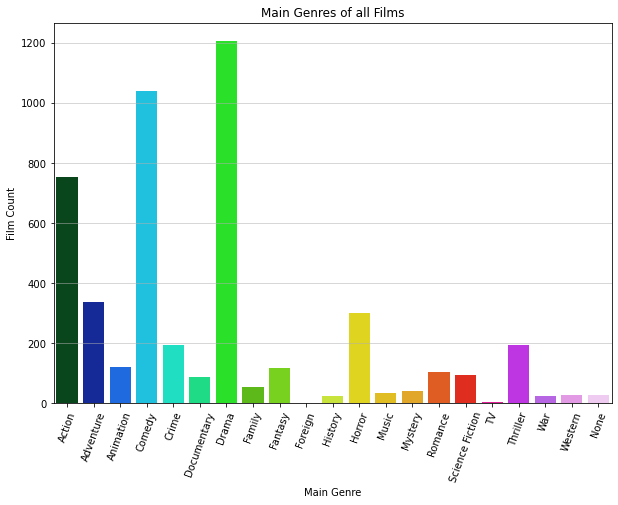

In [25]:
# Plot counts of each main genre
plt.figure(figsize=(10,7))
sns.countplot(data=tmdb,x='Main Genre',palette='gist_ncar')
plt.xticks(rotation=70)
plt.title('Main Genres of all Films')
plt.ylabel('Film Count')
plt.grid(visible=True,axis='y',lw=0.5)
plt.show()
# There are 2 Foreign movies, not 0

In [140]:
tmdb_cat=tmdb.groupby('Main Genre')[['vote_average']].mean() #group the data by the 'Main Genre' categories and find the mean 
# vote average for each genre 
tmdb_cat.reset_index(inplace=True) # Genre acts as index, so reset the index to be 0, 1, 2 etc

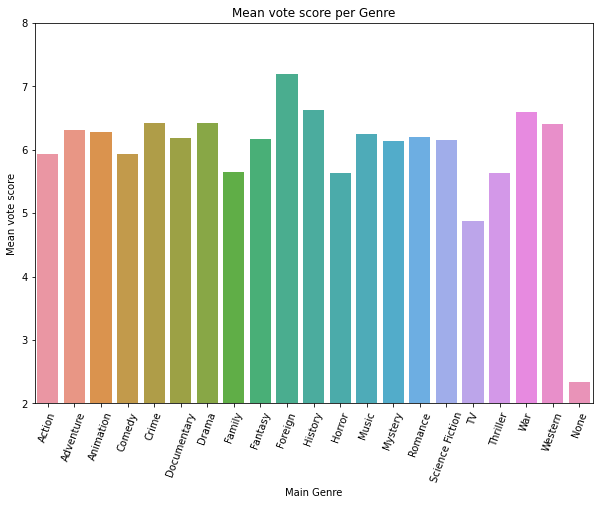

In [151]:
# Plot the mean vote average by genre as a bar graph
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_cat,x='Main Genre',y='vote_average')
plt.xticks(rotation=70)
plt.ylabel('Mean vote score')
plt.title('Mean vote score per Genre')
plt.ylim((2,8)) # limit y-axis between 2 and 8 to see values a bit more easily
plt.show()

The **Foreign** movie genre has the highest average rating, although there are only 2 of them in this dataset
<p> 
Otherwise the genres are all quite similar, sitting around an average rating of 6.

Perhaps, the **None** genre/category could have been removed from the data as they are mainly outliers</p>

# Profits

In [26]:
# Creating a new column called 'profit' which is the revenue minus the budget
tmdb['profit']=tmdb['revenue']-tmdb['budget']

In [36]:
tmdb_top_pro=tmdb.sort_values('profit',ascending=False)
tmdb_top_pro.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Main Genre,profit
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2550965087
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Drama,1645034188
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,Action,1363528810
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Action,1316249360
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776,Science Fiction,1299557910


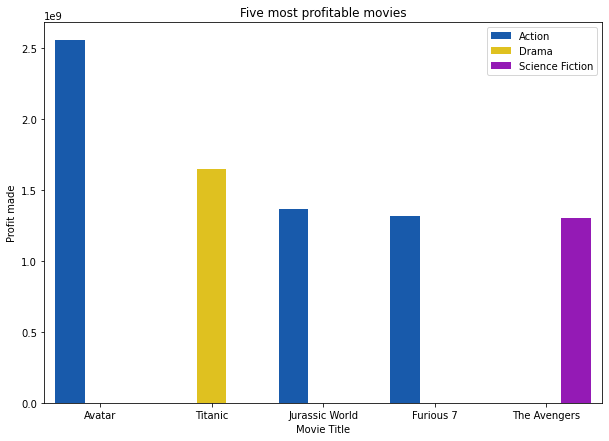

In [96]:
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_top_pro.head(),x='title',y='profit',
            hue=['Action','Drama','Action','Action','Science Fiction'],palette='prism')
plt.xlabel('Movie Title')
plt.ylabel('Profit made')
plt.title('Five most profitable movies')
plt.show()

In [27]:
tmdb_pro=tmdb.groupby('Main Genre')[['profit']].mean() # group by the 'Main Genre' and find the mean profit for each genre
tmdb_pro.reset_index(inplace=True) # reset index 

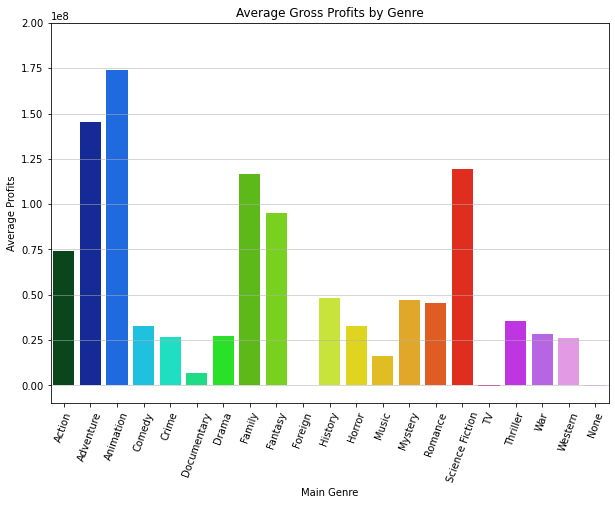

In [28]:
# Plot average profits by genre as bar graph
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_pro,x='Main Genre',y='profit',palette='gist_ncar')
plt.xticks(rotation=70)
plt.ylim(-1e7,2e8) # Foreign, TV and None have negative profits (losses) but are small compared to the scale of the profits 
# made by other genres
plt.ylabel('Average Profits')
plt.title('Average Gross Profits by Genre')
plt.grid(visible=True,axis='y',lw=0.5)
plt.show()

<h3>Animation movies make the most profit on average</h3>
<p>
Could this be because they attract the largest audiences or have the highest budgets?
</p>

Although the **Foreign** movies are (on average) highly rated they are making losses!


In [29]:
tmdb_votes=tmdb.groupby('Main Genre')[['popularity','vote_count']].mean() # group by 'Main Genre' and calculate mean popularity
# and vote_count (as vote_count could be a good analogy for popularity)
tmdb_votes.reset_index(inplace=True) # reset index

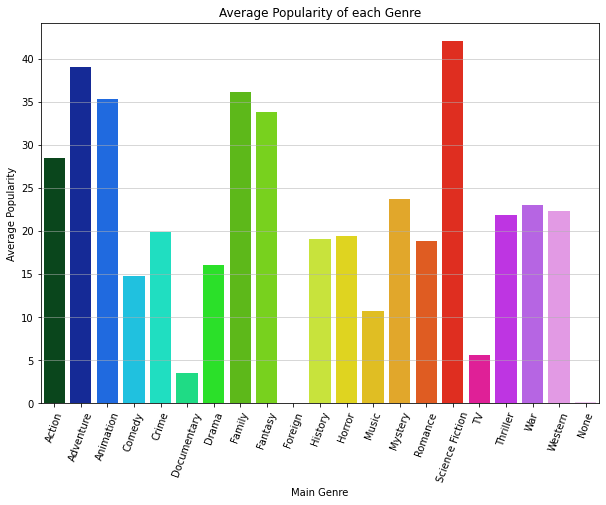

In [30]:
# Plot average popularity of each genre
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_votes,x='Main Genre',y='popularity',palette='gist_ncar')
plt.ylabel('Average Popularity')
plt.xticks(rotation=70)
plt.title('Average Popularity of each Genre')
plt.grid(visible=True,axis='y',lw=0.5)
plt.show()
# Foreign average popularity = 0.07 and None average popularity = 0.17

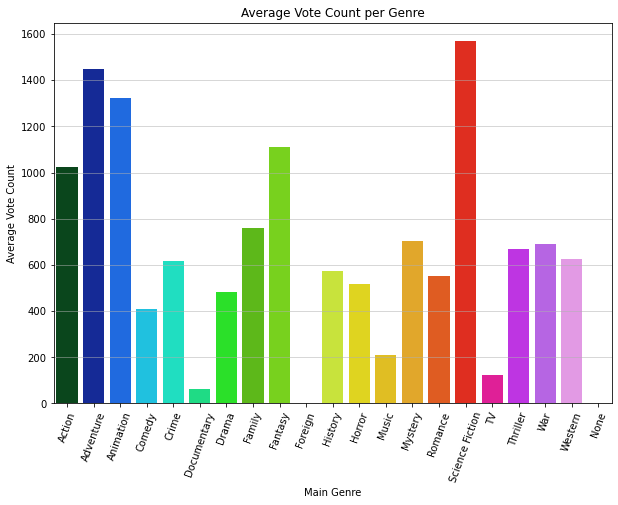

In [31]:
# Plot average vote count per genre
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_votes,x='Main Genre',y='vote_count',palette='gist_ncar')
plt.ylabel('Average Vote Count')
plt.title('Average Vote Count per Genre')
plt.grid(visible=True,axis='y',lw=0.5)
plt.xticks(rotation=70)
plt.show()
# Foreign average vote count = 4 and None average vote count = 1.4

<h3>Animation movies aren't the most popular genre! Science Fiction is!</h3>

It is also seen that **Foreign** movies are not very popular, which could explain why they make losses.



In [32]:
tmdb_budget=tmdb.groupby('Main Genre')[['budget']].mean() # group by 'Main Genre' and calculate mean budget per genre
tmdb_budget.reset_index(inplace=True) # reset the index

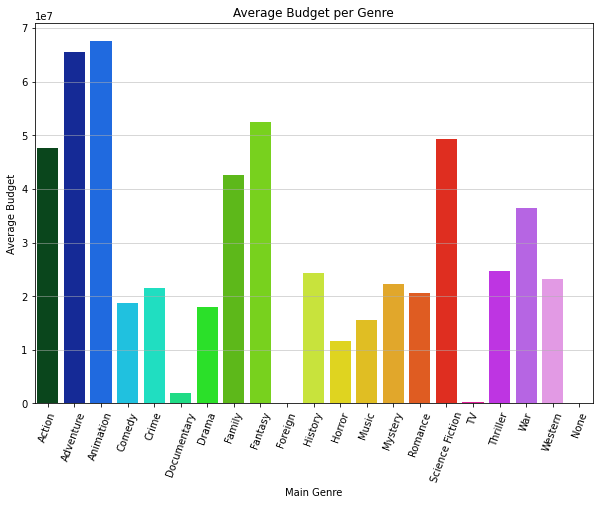

In [33]:
# Plot average budget for each genre
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_budget,x='Main Genre',y='budget',palette='gist_ncar')
plt.ylabel('Average Budget')
plt.title('Average Budget per Genre')
plt.xticks(rotation=70)
plt.grid(visible=True,axis='y',lw=0.5)
plt.show()
# Foreign, TV and None have average budgets below 1 million
# These plots also show that the None category is most likely not needed in this analysis

<h3>Animation movies do have the largest budgets<h3>

In [99]:
tmdb_top_budget=tmdb.sort_values('budget',ascending=False)
tmdb_top_budget.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Main Genre,profit
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948,Adventure,665713802
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,661000000
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,Action,1125403694
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,5.4,1400,Adventure,121081192
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action,24139100


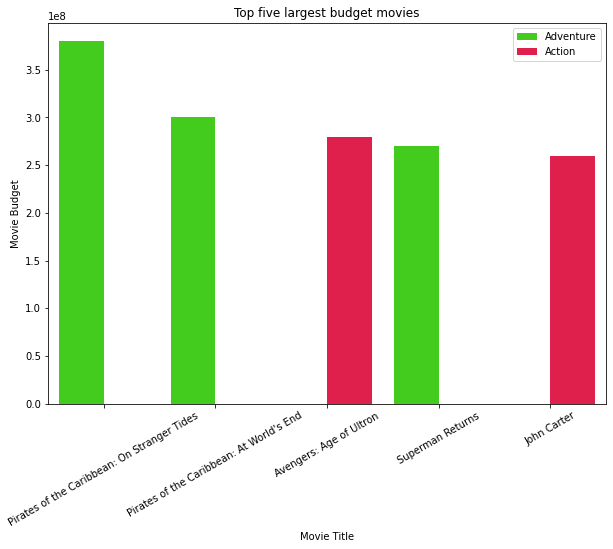

In [106]:
plt.figure(figsize=(10,7))
sns.barplot(data=tmdb_top_budget.head(),x='title',y='budget',
            hue=['Adventure','Adventure','Action','Adventure','Action'],palette='prism')
plt.xticks(rotation=30)
plt.title('Top five largest budget movies')
plt.xlabel('Movie Title')
plt.ylabel('Movie Budget')
plt.show()

### ....on average

<h3>Are budget and profit correlated?</h3> 

To answer this we must look at the correlations...

# Correlations

In [34]:
# Pandas correlation function/method to calculate all correlations in the dataframe (of numeric columns)
tmdb.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180,0.575852
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128,-0.033629
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130,0.620854
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487,0.978881
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944,0.219928
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997,0.208241
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000,0.758379
profit,0.575852,-0.033629,0.620854,0.978881,0.219928,0.208241,0.758379,1.000000


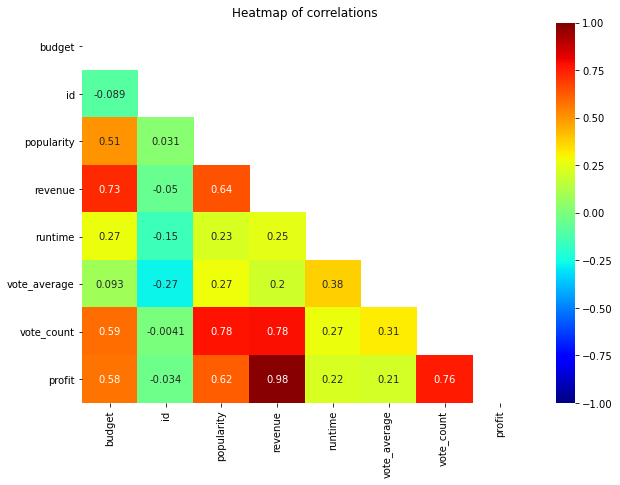

In [35]:
# Plot the correlations as a heatmap and annotate with the actual values as well
plt.figure(figsize=(10,7))
sns.heatmap(tmdb.corr(),annot=True,mask=np.triu(tmdb.corr()),vmin=-1,vmax=1,cmap='jet')
plt.title('Heatmap of correlations')
plt.show()

<h4> Budget and profit have quite a strong positive correlation (+0.58) </h4>


Although one might expect **budget** and **profit** to, perhaps, be slightly negatively correlated (a higher budget might reduce profit) but here we see that higher budget films make higher profits. There are potentially many reasons for this,
* a bigger budget to spend on marketing/advertising
* more 'a-list' actors could be hired
* use state-of-the-art technology to draw audiences

Also see here that **vote_count** and **popularity** are strongly correlated, suggesting they are analogous and also strong indicators of how much profit a movie will make

###

# 2 Movies:

### 1. The Shawshank Redemption

**The Shawshank Redemption** is the highest-rated movie with a significant number of votes - all movies with higher ratings have 2 or less votes - with 8205 in total and an average rating of <u>8.5</u>. Compared to an average vote count of 483.28 for the **Drama** genre and an average rating of <u>6.43</u>.

It has a much higher than average popularity, with the **Drama** genre averaging 16.09 and **The Shawshank Redemption** at 136.75.

It also has a slightly higher than average budget at \\$25,000,000 (average ~ \\$18,000,000) however, it has a lower than average profit at only just over \\$3,000,000 whereas the average **Drama** makes over \\$27,000,000.

This is not what the **budget**-**profit** correlation would suggest should happen

### 2. Superbabies: Baby Geniuses 2

**Superbabies: Baby Geniuses 2** is the lowest-rated movie with a significant number of votes. It has 35 votes and an average rating of <u>1.9</u>, which is a very low rating compared to most other comedies. The average **comedy** rating is just under <u>6</u>.

Despite its very low rating, it managed to make over \\$9,000,000 revenue (there is no budget listed for this movie). The first movie, **Baby Geniuses**, made over \\$34,000,000 in revenue and a profit of over \\$24,000,000.

**Superbabies: Baby Geniuses 2** was in fact very slightly more popular than the first one, although this did not translate into revenue or rating.

In [293]:
tmdb_top=tmdb.sort_values('vote_average',ascending=False)
tmdb_top.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Main Genre,profit
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,Comedy,0
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,Romance,-1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,Comedy,565592
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,Comedy,0
3992,0,[],NaN,346081,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],...,0,0.0,[],Released,NaN,Sardaarji,9.5,2,None,0
2386,0,"[{""id"": 37, ""name"": ""Western""}, {""id"": 28, ""na...",NaN,69848,"[{""id"": 6091, ""name"": ""war""}, {""id"": 6092, ""na...",en,One Man's Hero,One Man's Hero tells the little-known story of...,0.910529,"[{""name"": ""Filmax"", ""id"": 3631}, {""name"": ""Sil...",...,0,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One man's hero is another man's traitor.,One Man's Hero,9.3,2,Western,0
2970,10500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,88641,[],en,There Goes My Baby,A group of high school seniors meets in the su...,0.037073,"[{""name"": ""Nelson Entertainment"", ""id"": 365}]",...,123509,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,There Goes My Baby,8.5,2,Drama,-10376491
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,Drama,3341469
2796,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",NaN,43867,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 25...",en,The Prisoner of Zenda,An Englishman on a Ruritarian holiday must imp...,4.021389,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,0,101.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,The most thrilling swordfight ever filmed...,The Prisoner of Zenda,8.4,11,Adventure,0
3337,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,The Godfather,8.4,5893,Drama,239066411
